Payment History Dataset:
Shape: (132000, 5)

Payment Default Dataset:
Shape: (21455, 7)

Missing values in Payment History:
client_id         0
payment_status    0
bill_amt          0
paid_amt          0
month             0
dtype: int64

Missing values in Payment Default:
client_id         0
credit_given      0
gender            0
education         0
marital_status    0
month             0
default           0
dtype: int64

Payment History Summary Statistics:

Payment Default Summary Statistics:


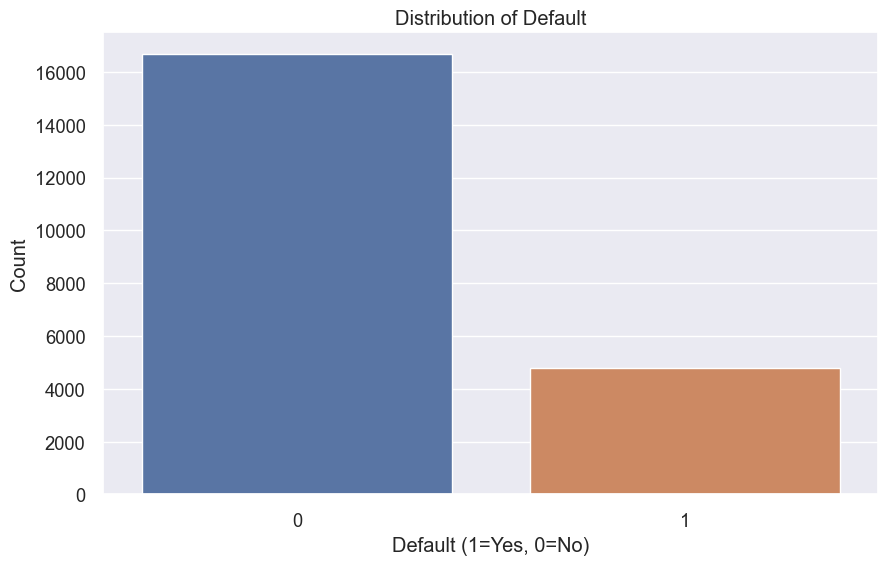

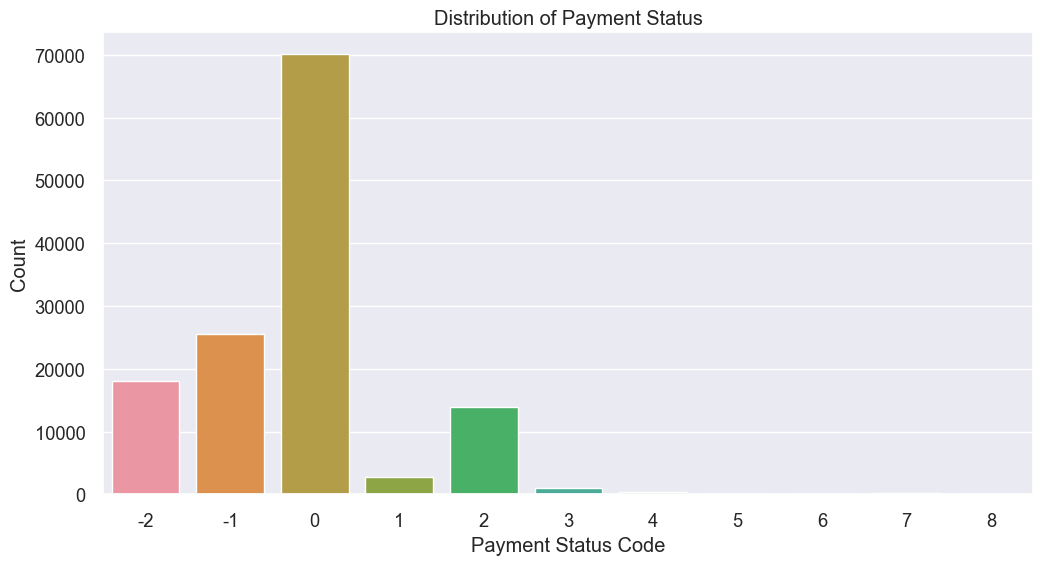

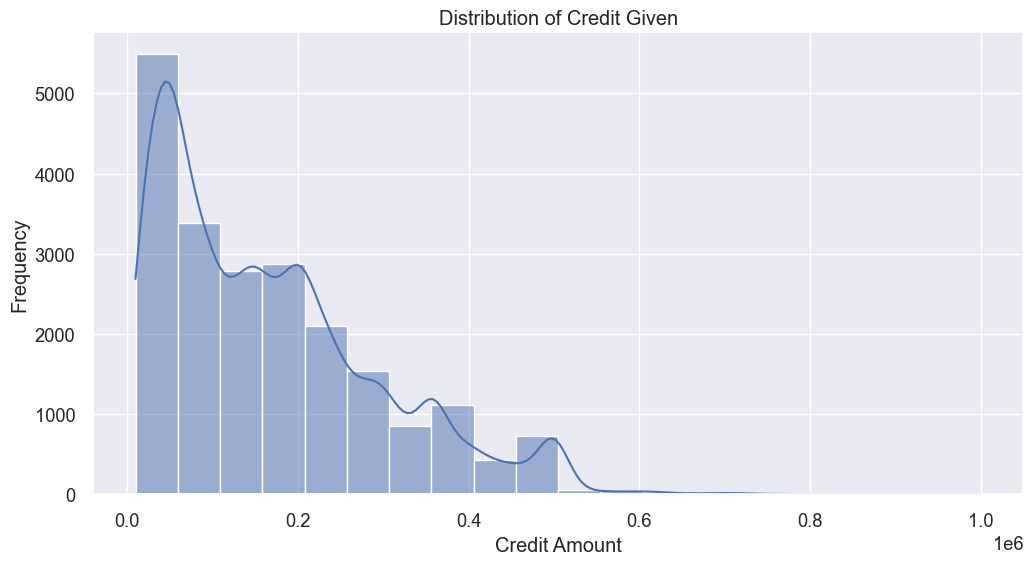

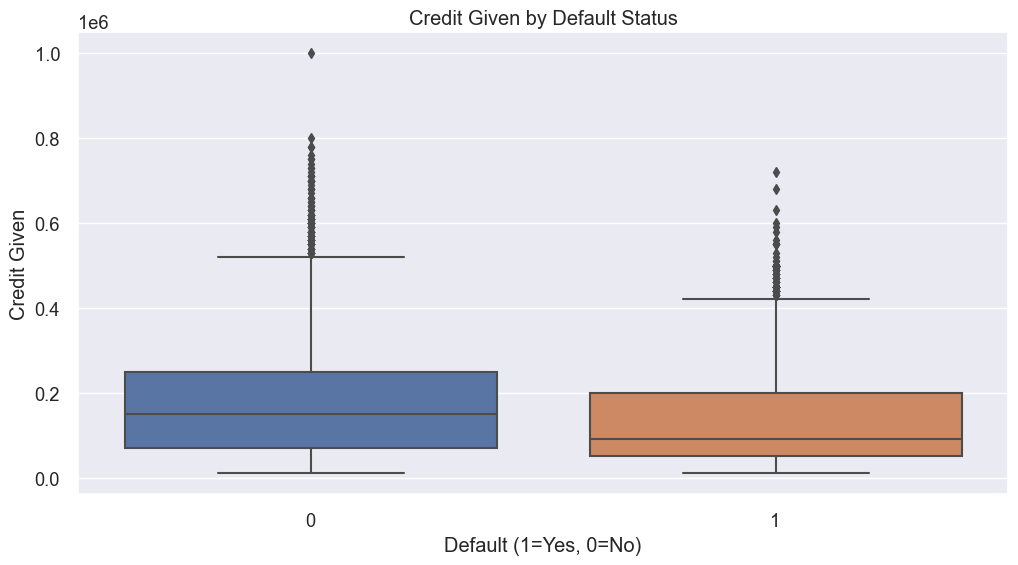

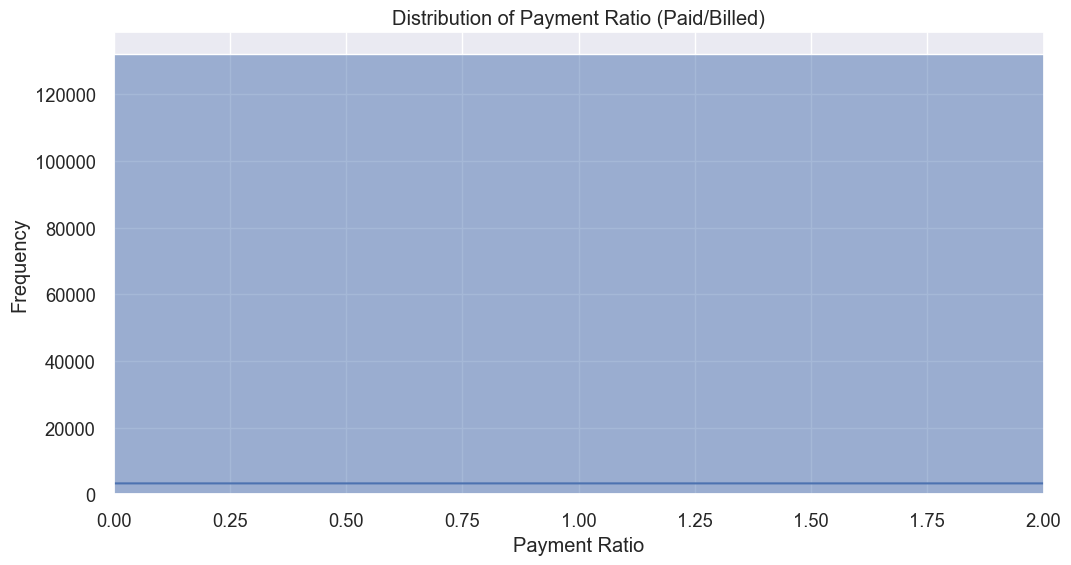

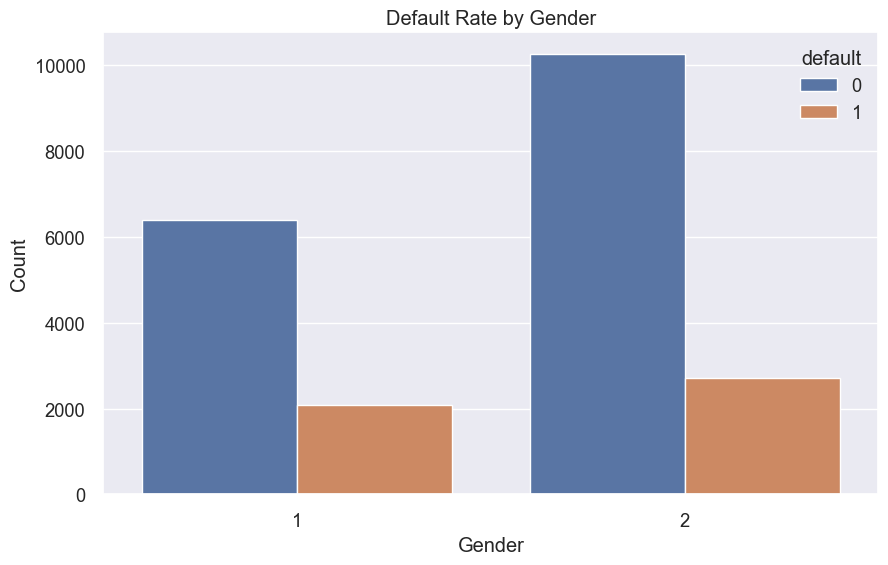

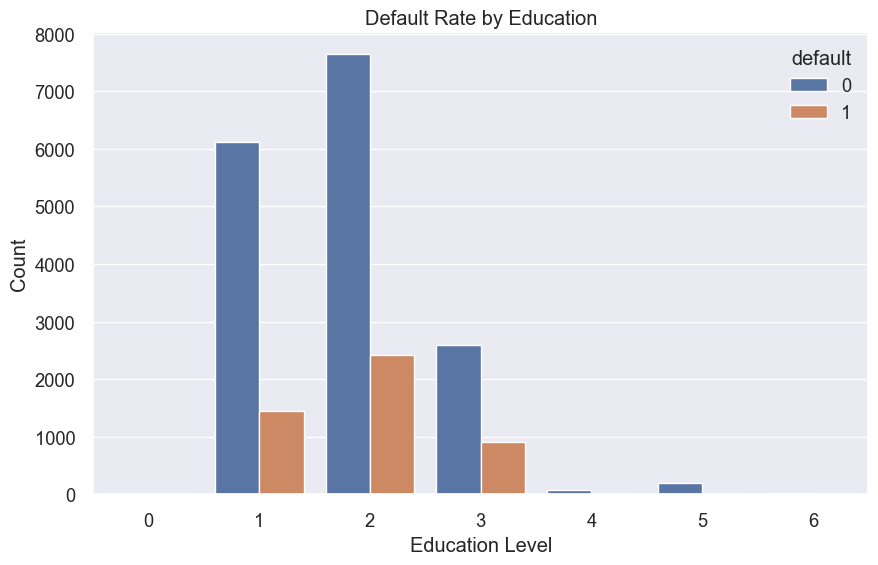

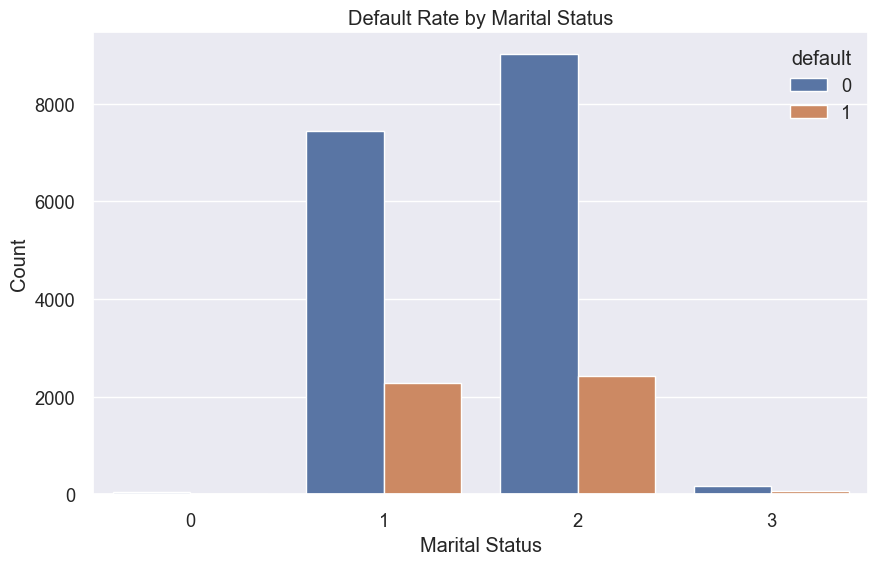

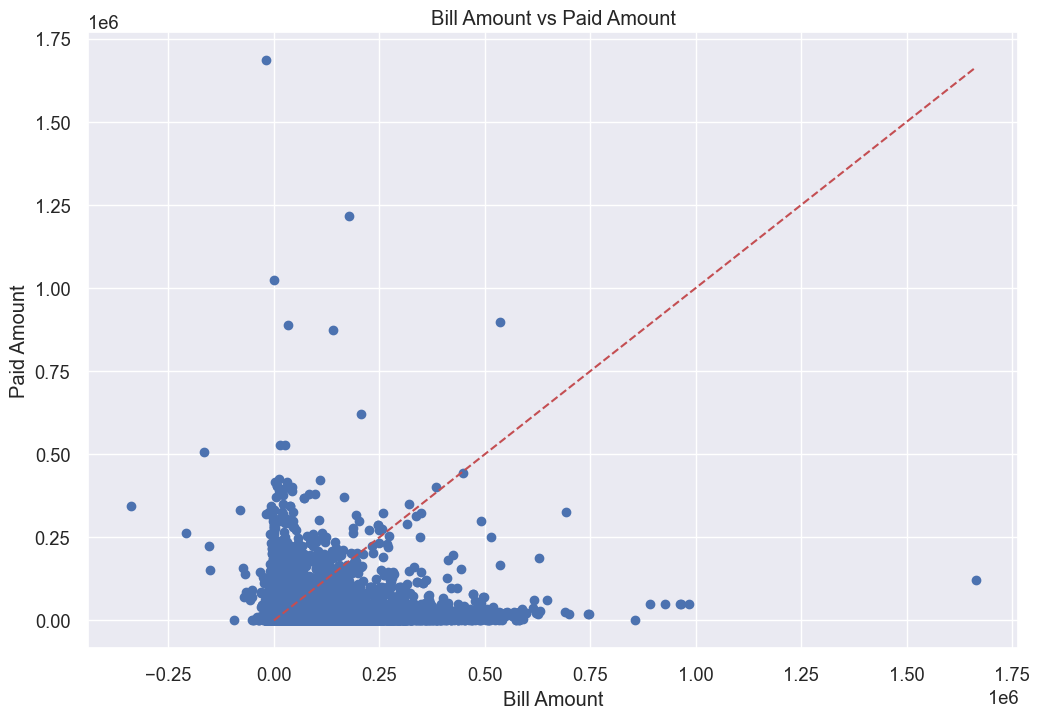

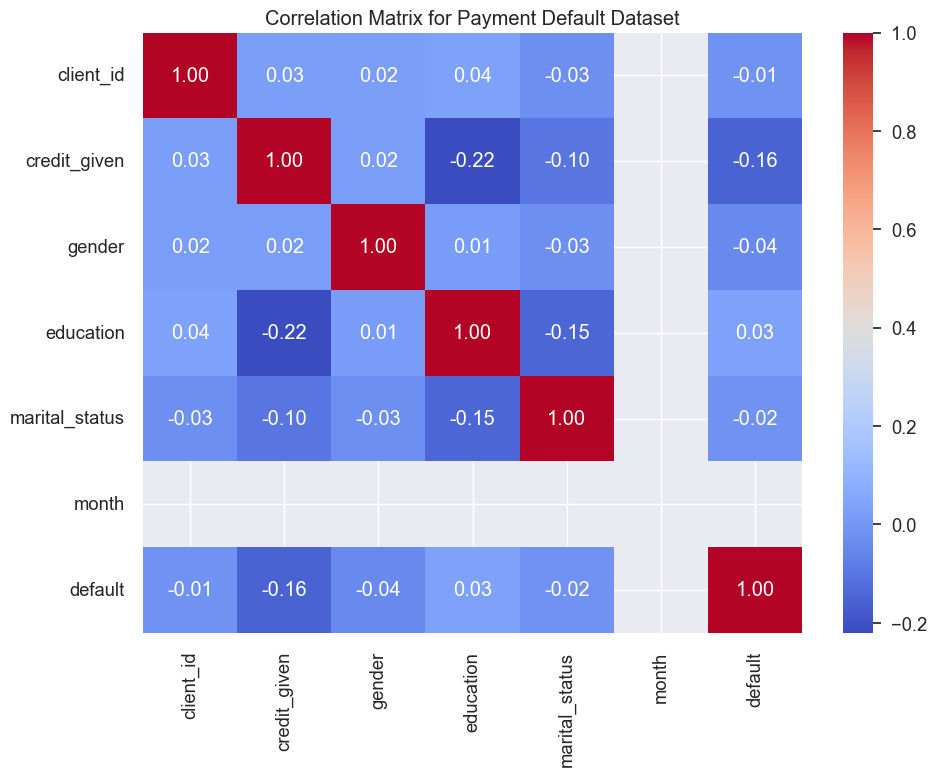


Key Insights from Exploratory Data Analysis:

1. Default rate: [Calculate and insert]
2. Payment status distribution: [Describe findings]
3. Credit given relationship with default: [Describe findings]
4. Demographic factors: [Describe findings]
5. Payment behavior patterns: [Describe findings]


Based on this exploratory analysis, we'll focus on these features for our model:
1. Credit amount (normalized)
2. Payment ratio (paid/billed)
3. Payment status indicators
4. Demographic factors
5. Unpaid amount aggregations



In [ ]:
# Exploratory Data Analysis for Payment Default Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.2)

# Load datasets
payment_history = pd.read_csv('../data/payment_history.csv')
payment_default = pd.read_csv('../data/payment_default.csv')

# Display basic information
print("Payment History Dataset:")
print(f"Shape: {payment_history.shape}")
payment_history.head()

# Display basic information about payment_default
print("\nPayment Default Dataset:")
print(f"Shape: {payment_default.shape}")
payment_default.head()

# Check for missing values
print("\nMissing values in Payment History:")
print(payment_history.isnull().sum())

print("\nMissing values in Payment Default:")
print(payment_default.isnull().sum())

# Summary statistics
print("\nPayment History Summary Statistics:")
payment_history.describe()

print("\nPayment Default Summary Statistics:")
payment_default.describe()

# Distribution of default
plt.figure(figsize=(10, 6))
sns.countplot(x='default', data=payment_default)
plt.title('Distribution of Default')
plt.xlabel('Default (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

# Distribution of payment status
plt.figure(figsize=(12, 6))
sns.countplot(x='payment_status', data=payment_history)
plt.title('Distribution of Payment Status')
plt.xlabel('Payment Status Code')
plt.ylabel('Count')
plt.show()

# Distribution of credit given
plt.figure(figsize=(12, 6))
sns.histplot(payment_default['credit_given'], bins=20, kde=True)
plt.title('Distribution of Credit Given')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

# Relationship between credit given and default
plt.figure(figsize=(12, 6))
sns.boxplot(x='default', y='credit_given', data=payment_default)
plt.title('Credit Given by Default Status')
plt.xlabel('Default (1=Yes, 0=No)')
plt.ylabel('Credit Given')
plt.show()

# Calculate payment ratio
payment_history['payment_ratio'] = payment_history['paid_amt'] / payment_history['bill_amt'].replace(0, np.nan)
payment_history['payment_ratio'] = payment_history['payment_ratio'].fillna(0)

# Distribution of payment ratio
plt.figure(figsize=(12, 6))
sns.histplot(payment_history['payment_ratio'], bins=20, kde=True)
plt.title('Distribution of Payment Ratio (Paid/Billed)')
plt.xlabel('Payment Ratio')
plt.ylabel('Frequency')
plt.xlim(0, 2)  # Limit to reasonable values
plt.show()

# Analysis by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='default', data=payment_default)
plt.title('Default Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Analysis by education
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='default', data=payment_default)
plt.title('Default Rate by Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Analysis by marital status
plt.figure(figsize=(10, 6))
sns.countplot(x='marital_status', hue='default', data=payment_default)
plt.title('Default Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Feature: bill amount vs paid amount
plt.figure(figsize=(12, 8))
plt.scatter(payment_history['bill_amt'], payment_history['paid_amt'])
plt.title('Bill Amount vs Paid Amount')
plt.xlabel('Bill Amount')
plt.ylabel('Paid Amount')
plt.plot([0, payment_history['bill_amt'].max()], [0, payment_history['bill_amt'].max()], 'r--')
plt.show()

# Correlation matrix for payment_default
plt.figure(figsize=(10, 8))
correlation = payment_default.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Payment Default Dataset')
plt.tight_layout()
plt.show()

# Key insights from EDA
print("""
Key Insights from Exploratory Data Analysis:

1. Default rate: [Calculate and insert]
2. Payment status distribution: [Describe findings]
3. Credit given relationship with default: [Describe findings]
4. Demographic factors: [Describe findings]
5. Payment behavior patterns: [Describe findings]
""")

# Conclusion
print("""
Based on this exploratory analysis, we'll focus on these features for our model:
1. Credit amount (normalized)
2. Payment ratio (paid/billed)
3. Payment status indicators
4. Demographic factors
5. Unpaid amount aggregations
""")